In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [28]:
#model.weights 

In [29]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.29360458, -0.10948813, -0.21801212, -0.24093549,  0.239075  ,
         -0.256562  ,  0.2960062 ,  0.08567244, -0.00675839, -0.09919947,
          0.1124748 ,  0.07003149, -0.1517843 ,  0.25199455, -0.05177569,
         -0.1388351 ,  0.11077979,  0.0811716 ,  0.16656122,  0.21916002,
          0.12878567, -0.17866994, -0.21632227, -0.14339884,  0.26978016,
         -0.2653585 ,  0.28402162, -0.02155277, -0.00393188,  0.28135872,
         -0.02631408, -0.17090707,  0.21539253, -0.14805768, -0.18438044,
          0.14911348,  0.19836056, -0.09905484,  0.25019503, -0.0083054 ,
          0.21652389,  0.16363126,  0.00633585,  0.07126731, -0.2143921 ,
          0.19324851,  0.16124812,  0.02879688, -0.24082118, -0.19242673,
          0.01442295, -0.16843408, -0.12102707, -0.07398023,  0.07294932,
         -0.29419914, -0.06792918,  0.02445161,  0.27438915, -0.00433758,
         -0.18829107,  0.21749014,  0.0207

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                256       
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build(input_shape=(32,3,3,3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (32, 3, 3, 64)            256       
                                                                 
 my_last_layer (Dense)       (32, 3, 3, 10)            650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [32]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,3,3)))
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 3, 3, 64)          256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 3, 3, 64)          256       
                                                                 
 dense_15 (Dense)            (None, 3, 3, 10)          650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [34]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [35]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_16 (Dense)            (None, 64)                256       
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [36]:
inputs.shape

TensorShape([None, 3])

In [37]:
 vocabulary_size = 10000
 num_tags = 100
 num_departments = 4

 title =  keras.Input(shape=(vocabulary_size,), name='title')
 text_body = keras.Input(shape=(vocabulary_size), name='text_body')
 tags = keras.Input(shape=(num_tags,), name='tags')

 features = layers.Concatenate()([title, text_body, tags])
 features = layers.Dense(64, activation='relu')(features)

 priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
 department = layers.Dense(
     num_departments, activation = 'softmax', name = 'deparment')(features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])

In [38]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=5)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

Epoch 1/5
40/40 [==============================] - 1s 17ms/step - loss: 23.8183 - priority_loss: 0.3451 - deparment_loss: 23.4731 - priority_mean_absolute_error: 0.5102 - deparment_accuracy: 0.2703
Epoch 2/5
40/40 [==============================] - 1s 16ms/step - loss: 20.7795 - priority_loss: 0.3506 - deparment_loss: 20.4290 - priority_mean_absolute_error: 0.5148 - deparment_accuracy: 0.2313
Epoch 3/5
40/40 [==============================] - 1s 16ms/step - loss: 27.1293 - priority_loss: 0.3506 - deparment_loss: 26.7787 - priority_mean_absolute_error: 0.5148 - deparment_accuracy: 0.2570
Epoch 4/5
40/40 [==============================] - 1s 17ms/step - loss: 34.7653 - priority_loss: 0.3506 - deparment_loss: 34.4147 - priority_mean_absolute_error: 0.5148 - deparment_accuracy: 0.2516
Epoch 5/5
40/40 [==============================] - 0s 6ms/step - loss: 43.5612 - priority_loss: 0.3506 - deparment_loss: 43.2106 - priority_mean_absolute_error: 0.5148 - deparment_accuracy: 0.1305


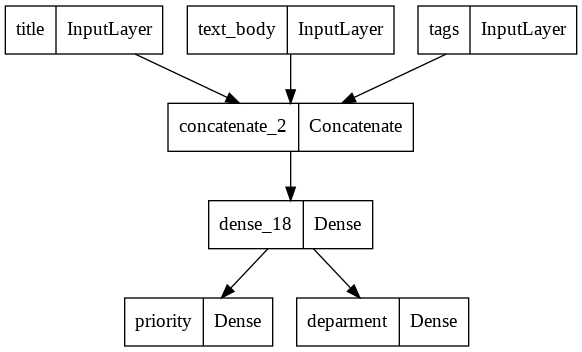

In [39]:
keras.utils.plot_model(model, "ticket_classifier.png")

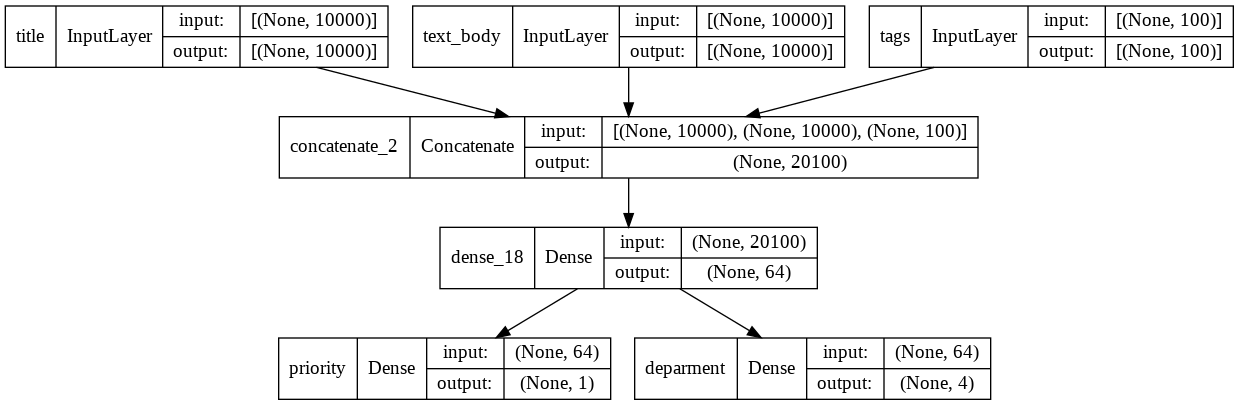

In [40]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [41]:
model.layers

In [42]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [43]:
model.layers[4]

In [44]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

Let’s say you want to add another output to the previous model—you want to esti-
mate how long a given issue ticket will take to resolve, a kind of difficulty rating. You
could do this via a classification layer over three categories: “quick,” “medium,” and
“difficult.” You don’t need to recreate and retrain a model from scratch. You can start
from the intermediate features of your previous model, since you have access to them,
like this.

In [45]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficaulty')(features)

new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty]
)

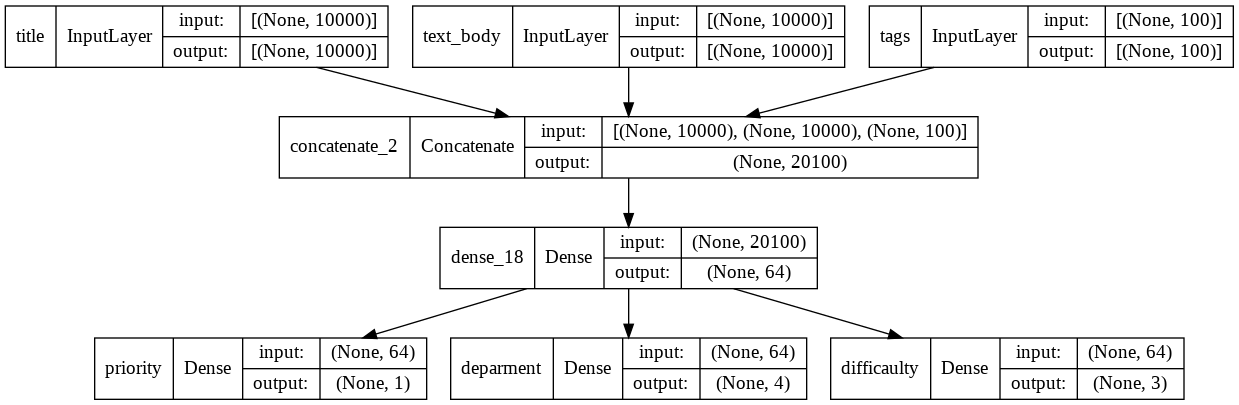

In [46]:
keras.utils.plot_model(new_model, "updated_ticket_classification.png", show_shapes=True)

In [47]:
# Subclassed Model

class CustomerTicketModel(keras.Model):

  def __init__(self, num_departments):
    super().__init__() # initializer a keras model
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation='relu')
    self.priority_scorer = layers.Dense(1, activation='sigmoid')
    self.department_classifier = layers.Dense(
        num_departments, activation='softmax')
    
  def call(self, inputs):
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)

    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [48]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {'title': title_data, "text_body": text_body_data, "tags": tags_data}
)

In [49]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])

model.fit({'title':title_data,
           'text_body': text_body_data,
           'tags': tags_data},
          [priority_data, department_data],
          epochs=5)
model.evaluate({'title':title_data,
           'text_body': text_body_data,
           'tags': tags_data},
            [priority_data, department_data])

priority_pred, department_preds = model.predict({'title':title_data,
                                                  'text_body': text_body_data,
                                                  'tags': tags_data})

Epoch 1/5
40/40 [==============================] - 1s 20ms/step - loss: 69.7489 - output_1_loss: 0.3466 - output_2_loss: 69.4023 - output_1_mean_absolute_error: 0.5117 - output_2_accuracy: 0.2953
Epoch 2/5
40/40 [==============================] - 1s 18ms/step - loss: 40.0011 - output_1_loss: 0.3506 - output_2_loss: 39.6505 - output_1_mean_absolute_error: 0.5148 - output_2_accuracy: 0.2734
Epoch 3/5
40/40 [==============================] - 1s 18ms/step - loss: 36.6993 - output_1_loss: 0.3506 - output_2_loss: 36.3488 - output_1_mean_absolute_error: 0.5148 - output_2_accuracy: 0.2664
Epoch 4/5
40/40 [==============================] - 1s 18ms/step - loss: 43.5415 - output_1_loss: 0.3506 - output_2_loss: 43.1910 - output_1_mean_absolute_error: 0.5148 - output_2_accuracy: 0.2555
Epoch 5/5
40/40 [==============================] - 0s 7ms/step - loss: 42.1435 - output_1_loss: 0.3506 - output_2_loss: 41.7929 - output_1_mean_absolute_error: 0.5148 - output_2_accuracy: 0.1344


In [50]:
class Classifier(keras.Model):

  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [54]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs = keras.Input(shape=(28*28,))
  features = layers.Dense(512, activation="relu")(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation="softmax")(features)
  model = keras.Model(inputs, outputs)
  return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype('float32')/255
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=4,
          validation_data = (val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/4
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2948 - accuracy: 0.9119 - val_loss: 0.1434 - val_accuracy: 0.9590
Epoch 2/4
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1667 - accuracy: 0.9535 - val_loss: 0.1264 - val_accuracy: 0.9651
Epoch 3/4
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1402 - accuracy: 0.9623 - val_loss: 0.1179 - val_accuracy: 0.9711
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9759


In [56]:
callbacks_list = [
  keras.callbacks.EarlyStopping(
      monitor='val_accuracy',
      patience=2,
  ),
  keras.callbacks.ModelCheckpoint(
      filepath='checkpoint_path.keras',
      monitor='val_loss',
      save_best_only=True,
  )]
  
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data = (val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2944 - accuracy: 0.9129 - val_loss: 0.1409 - val_accuracy: 0.9597
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1631 - accuracy: 0.9531 - val_loss: 0.1174 - val_accuracy: 0.9672
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1368 - accuracy: 0.9623 - val_loss: 0.1188 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1240 - accuracy: 0.9679 - val_loss: 0.1116 - val_accuracy: 0.9726
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1181 - accuracy: 0.9706 - val_loss: 0.1093 - val_accuracy: 0.9745
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1075 - accuracy: 0.9740 - val_loss: 0.1123 - val_accuracy: 0.9768
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1064 - accuracy: 0.9749 - val_loss: 0.1181 - val_accuracy:

In [57]:
model.save('my_checkpoint_path')

INFO:tensorflow:Assets written to: my_checkpoint_path/assets


In [59]:
loaded_model = keras.models.load_model('checkpoint_path.keras')
loaded_model.evaluate(val_images, val_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9776


[0.1072724238038063, 0.9775999784469604]

In [63]:
from matplotlib import pyplot as plt
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []

  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get('loss'))
  
  def on_epoch_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
             label='Training loss for each batch')
    plt.xlabel(f'Batch (epoch {epoch})')
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f'plot_at_epoch_{epoch}')
    self.per_batch_losses = []    

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2901 - accuracy: 0.9132 - val_loss: 0.1558 - val_accuracy: 0.9567
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1637 - accuracy: 0.9553 - val_loss: 0.1244 - val_accuracy: 0.9674
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1400 - accuracy: 0.9637 - val_loss: 0.1186 - val_accuracy: 0.9692
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1246 - accuracy: 0.9679 - val_loss: 0.1077 - val_accuracy: 0.9749
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1190 - accuracy: 0.9706 - val_loss: 0.1050 - val_accuracy: 0.9755
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1086 - accuracy: 0.9728 - val_loss: 0.1159 - val_accuracy: 0.9754
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1076 - accuracy: 0.9747 - val_loss: 0.1100 - val_accuracy:

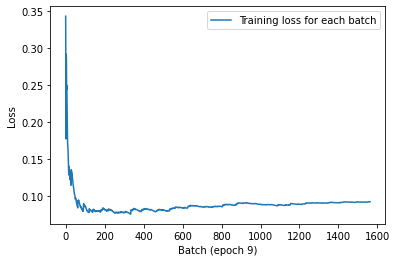

In [65]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks= [LossHistory()],
          validation_data = (val_images, val_labels))

In [66]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

tensorboard = keras.callbacks.TensorBoard(
    log_dir = '/content/logs'
)

model.fit(train_images, train_labels,
          epochs=4,
          validation_data = (val_images, val_labels),
          callbacks = [tensorboard])

Epoch 1/4
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2983 - accuracy: 0.9113 - val_loss: 0.1559 - val_accuracy: 0.9534
Epoch 2/4
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1645 - accuracy: 0.9536 - val_loss: 0.1306 - val_accuracy: 0.9640
Epoch 3/4
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1397 - accuracy: 0.9617 - val_loss: 0.1218 - val_accuracy: 0.9695
Epoch 4/4
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1251 - accuracy: 0.9674 - val_loss: 0.1097 - val_accuracy: 0.9740


In [71]:
!tensorboard dev upload --logdir /content/logs \

2021-11-26 00:02:28.175552: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg

In [79]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradient(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs[metric.name] = metric.result()

  loss_tracking_metric.update_state(loss)
  logs['loss'] = loss_tracking_metric.result()
  return logs

In [80]:
def reset_metrics():
  for metric in metrics:
    metric.reset_state()
  loss_tracking_metric.reset_state()

In [81]:
import tensorflow as tf


In [82]:
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))

training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
  reset_metrics()
  for inputs_batch, targets_batch in  training_dataset:
    logs = train_step(inputs_batch, targets_batch)
  print(f'Results at the end of epoch {epoch}')
  for key, value in logs.items():
    print(f'...{key}: {value:.4f}')

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9143
...loss: 0.2874
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9547
...loss: 0.1637
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9625
...loss: 0.1383


In [85]:
@tf.function
def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs['val_'+metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()
    return logs
  
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch, in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("Evaluation results")
for key, value in logs.items():
  print(f'...{key}: {value:.4f}')

Evaluation results
...val_sparse_categorical_accuracy: 0.9684
...val_loss: 0.1301
